In [34]:
from cdsgd import DSClustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from lime.lime_tabular import LimeTabularExplainer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score, accuracy_score
import wittgenstein as lw
#pca
from sklearn.decomposition import PCA

In [1]:
Heart = pd.read_csv('../data/SAheart.csv')
#drop class and id
Heart = Heart.drop(columns=['row.names', 'chd'])
#convert categorical to numerical
Heart['famhist'] = Heart['famhist'].map({'Present': 1, 'Absent': 0})
print("Shape of Heart data: ", Heart.shape)
#tipos de las columnas
print(Heart.dtypes)

NameError: name 'pd' is not defined

Kmeans Silhouette Score: 0.4013527977027373 Number of Clusters: 2
Agglomerative Silhouette Score: 0.42264620132872543 Number of Clusters: 2


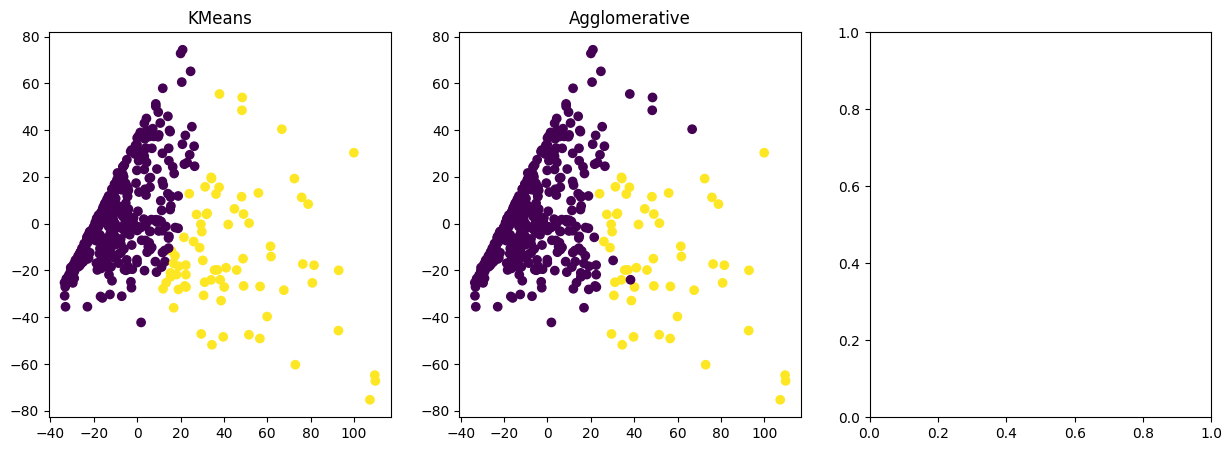

In [36]:
""" scaler = StandardScaler()
Heart_scaled = scaler.fit_transform(Heart)
Heart_scaled = pd.DataFrame(Heart_scaled, columns=Heart.columns) """
nClusters = 2
models = []
kmeans = KMeans(n_clusters=nClusters)
kmeans_labels = kmeans.fit_predict(Heart)
models.append({'model': kmeans, 'name': 'KMeans', 'labels': kmeans_labels})
print('Kmeans Silhouette Score:', silhouette_score(Heart, kmeans_labels), "Number of Clusters:", len(np.unique(kmeans_labels)))
agg = AgglomerativeClustering(n_clusters=nClusters)
agg_labels = agg.fit_predict(Heart)
models.append({'model': agg, 'name': 'Agglomerative', 'labels': agg_labels})
print('Agglomerative Silhouette Score:', silhouette_score(Heart, agg_labels), "Number of Clusters:", len(np.unique(agg_labels)))

# visualize the clusters
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, model in enumerate(models):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(Heart)
    ax[i].scatter(pca_result[:, 0], pca_result[:, 1], c=model['labels'], cmap='viridis')
    ax[i].set_title(model['name'])
plt.show()

## Lime

In [37]:
clustterToExplain = 1
i = 100 # instance to explain

#KMeans
y = (kmeans_labels == clustterToExplain).astype(int)
X_train, X_test, y_train, y_test = train_test_split(Heart, y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(Heart, y)
print('KMeans Accuracy:', accuracy_score(y, clf.predict(Heart)))
explainer = LimeTabularExplainer(Heart.values, mode='classification', feature_names=Heart.columns, class_names=['0', '1'], discretize_continuous=True)
exp = explainer.explain_instance(Heart.values[i], clf.predict_proba, num_features=5)
exp.show_in_notebook(show_table=True, show_all=False)

#Agglomerative
y = (agg_labels == clustterToExplain).astype(int)
X_train, X_test, y_train, y_test = train_test_split(Heart, y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(Heart, y)
print('Agglomerative Accuracy:', accuracy_score(y, clf.predict(Heart)))
explainer = LimeTabularExplainer(Heart.values, mode='classification', feature_names=Heart.columns, class_names=['0', '1'], discretize_continuous=True)
exp = explainer.explain_instance(Heart.values[i], clf.predict_proba, num_features=5)
exp.show_in_notebook(show_table=True, show_all=False)

KMeans Accuracy: 0.9956709956709957


c:\Users\Danie\OneDrive\Documentos\GitHub\trabajo-dirigido\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Danie\OneDrive\Documentos\GitHub\trabajo-dirigido\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Agglomerative Accuracy: 0.9675324675324676


c:\Users\Danie\OneDrive\Documentos\GitHub\trabajo-dirigido\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Danie\OneDrive\Documentos\GitHub\trabajo-dirigido\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Decision tree

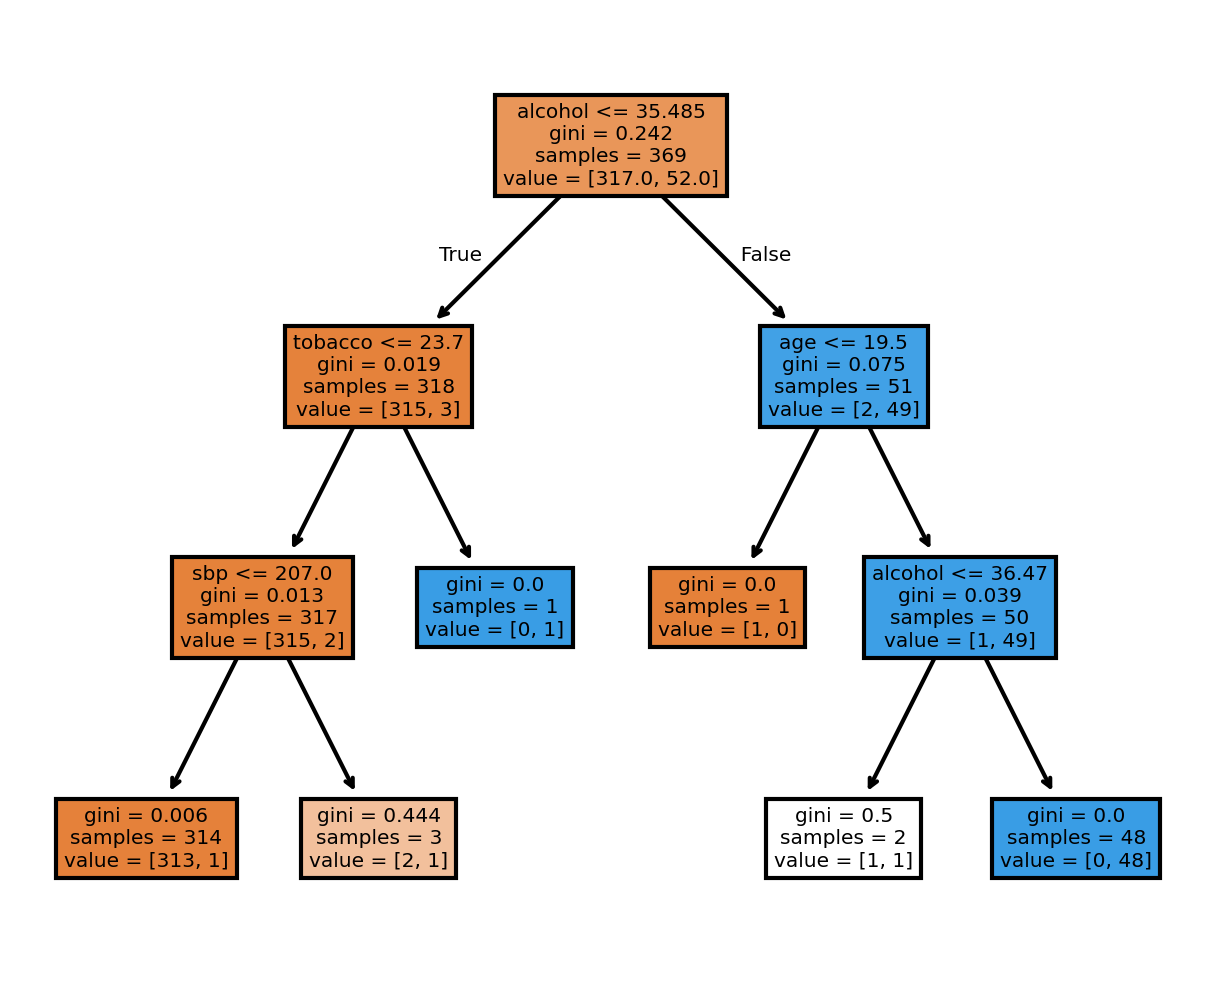

Decision Tree Accuracy: 0.989247311827957


In [61]:
# interpretamos con decision tree
X_train, X_test, y_train, y_test = train_test_split(Heart, kmeans_labels, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,4), dpi = 300)
plot_tree(dt, filled=True, ax=axes, feature_names=Heart.columns)
plt.show()
y_pred = dt.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred))


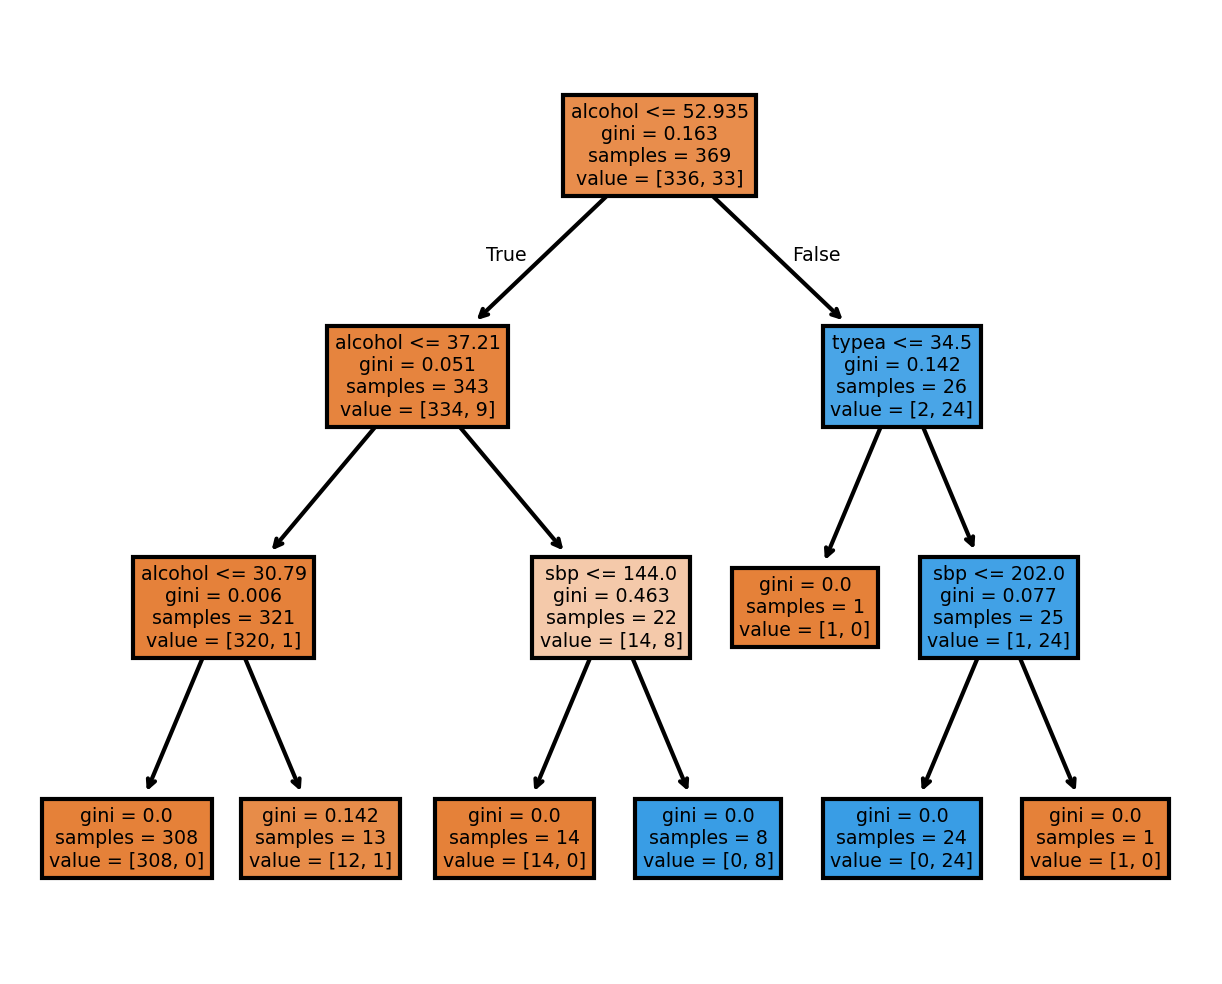

Decision Tree Accuracy: 0.967741935483871


In [39]:
# interpretamos con decision tree
X_train, X_test, y_train, y_test = train_test_split(Heart, agg_labels, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,4), dpi = 300)
plot_tree(dt, filled=True, ax=axes, feature_names=Heart.columns)
plt.show()
y_pred = dt.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred))

# RIPPER

In [60]:
pos = 1
# cambiamos las etiquetas para que el positivo sea el cluster 0
kmeans_labels_pos = (kmeans_labels == pos).astype(int)
agg_labels_pos = (agg_labels == pos).astype(int)
# KMeans
ripper = lw.RIPPER()
df = pd.concat([Heart, pd.DataFrame(kmeans_labels_pos, columns=['label'])], axis=1)
ripper.fit(df, class_feat='label', pos_class=1)
print(ripper.ruleset_)
y_pred = ripper.predict(Heart)
print('RIPPER Accuracy KMeans:', accuracy_score(kmeans_labels_pos, y_pred))
# Agglomerative
ripper = lw.RIPPER()
df = pd.concat([Heart, pd.DataFrame(agg_labels_pos, columns=['label'])], axis=1)
ripper.fit(df, class_feat='label', pos_class=1)
print(ripper.ruleset_)
y_pred = ripper.predict(Heart)
print('RIPPER Accuracy Agglomerative:', accuracy_score(agg_labels_pos, y_pred))

[[alcohol=>47.51] V [alcohol=27.77-47.51]]
RIPPER Accuracy KMeans: 0.9588744588744589
[[alcohol=>47.51] V [alcohol=27.77-47.51^tobacco=4.5-6.16] V [alcohol=27.77-47.51^sbp=144.0-154.0^tobacco=1.02-2.0] V [alcohol=27.77-47.51^sbp=154.0-166.0]]
RIPPER Accuracy Agglomerative: 0.9761904761904762


## DSClustering

Optimization started
Processing epoch	373	0.0009	
Training time: 45.28s, epochs: 400

Least training loss reached: 0.001
Accuracy: 99.3%
CD-SGD Silhouette Score: 0.3937715342899259 Number of Clusters: 2


C:\Users\Danie\AppData\Local\Temp\ipykernel_22592\3287312266.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


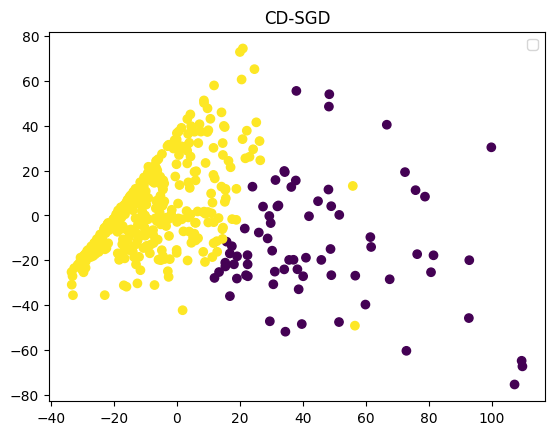

In [41]:
cdsgd = DSClustering(data=Heart,cluster=2, )
cdsgd.generate_categorical_rules()
cdsgd_labels = cdsgd.predict()
models.append({'model': cdsgd, 'name': 'CD-SGD con 2 clusters', 'labels': cdsgd_labels})
print('CD-SGD Silhouette Score:', silhouette_score(Heart, cdsgd_labels), "Number of Clusters:", len(np.unique(cdsgd_labels)))
#vvisualize the clusters
pca = PCA(n_components=2)
pca_result = pca.fit_transform(Heart)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cdsgd_labels, cmap='viridis')
plt.title('CD-SGD')
plt.legend()
plt.show()

In [42]:
cdsgd.print_most_important_rules()



Most important rules for Cluster 0

	[0.687] R34: alcohol > 33.738
			0: 0.687	1: 0.000	Unc: 0.313

	[0.449] R8: sbp > 153.653
			0: 0.449	1: 0.000	Unc: 0.551

	[0.395] R13: ldl < 3.329
			0: 0.395	1: 0.000	Unc: 0.605

	[0.371] R12: tobacco > 6.710
			0: 0.371	1: 0.000	Unc: 0.629

	[0.352] R19: 25.593 < adiposity < 30.511
			0: 0.352	1: 0.000	Unc: 0.648

	[0.306] R91: Negative ldl - 4.709, typea - 53.918
			0: 0.306	1: 0.000	Unc: 0.694

	[0.294] R29: 26.383 < obesity < 29.337
			0: 0.294	1: 0.000	Unc: 0.706

	[0.257] R58: Positive sbp - 139.614, age - 42.734
			0: 0.257	1: 0.000	Unc: 0.743

	[0.242] R35: age < 32.963
			0: 0.242	1: 0.000	Unc: 0.758

	[0.234] R73: Negative tobacco - 3.671, typea - 53.918
			0: 0.234	1: 0.000	Unc: 0.766

	[0.234] R93: Negative ldl - 4.709, obesity - 26.383
			0: 0.234	1: 0.000	Unc: 0.766

	[0.228] R75: Negative tobacco - 3.671, obesity - 26.383
			0: 0.228	1: 0.000	Unc: 0.772

	[0.213] R45: Negative sbp - 139.614, tobacco - 3.671
			0: 0.210	1: 0.007	U

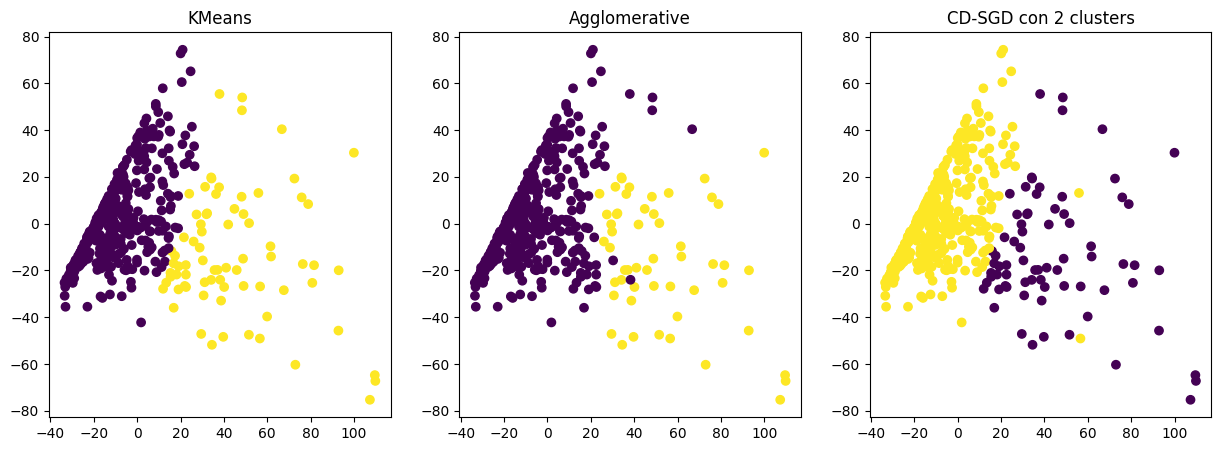

In [66]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, model in enumerate(models):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(Heart)
    ax[i].scatter(pca_result[:, 0], pca_result[:, 1], c=model['labels'], cmap='viridis')
    ax[i].set_title(model['name'])
plt.show()